# Testing Distance Meaasures

We will use the four different Distance messures available:

z-Normed Euclidean Distance
Euclidean Distance
Cosine Distance
Complexity Invariant Distance

In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
sys.path.insert(0, "../")

from motiflets.motiflets import *
from motiflets.plotting import *

import subprocess
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

# Dataset: Physiodata - EEG sleep data
    
This Physiodata - EEG sleep dataset contains a recording of an afternoon nap of a healthy, nonsmoking person, between 20 to 40 years old. Data was recorded with an extrathoracic strain belt. The dataset consists of $269.286$ points at $100hz$ corresponding to $45min$. Known motifs are so-called sleep spindles and $k$-complexes.

### References:
- [1] https://link.springer.com/content/pdf/10.1007/s004220000144.pdf
- [2] https://epubs.siam.org/doi/pdf/10.1137/1.9781611972795.41

Dataset Original Length n:  10358
Dataset Sampled Length n:  10358


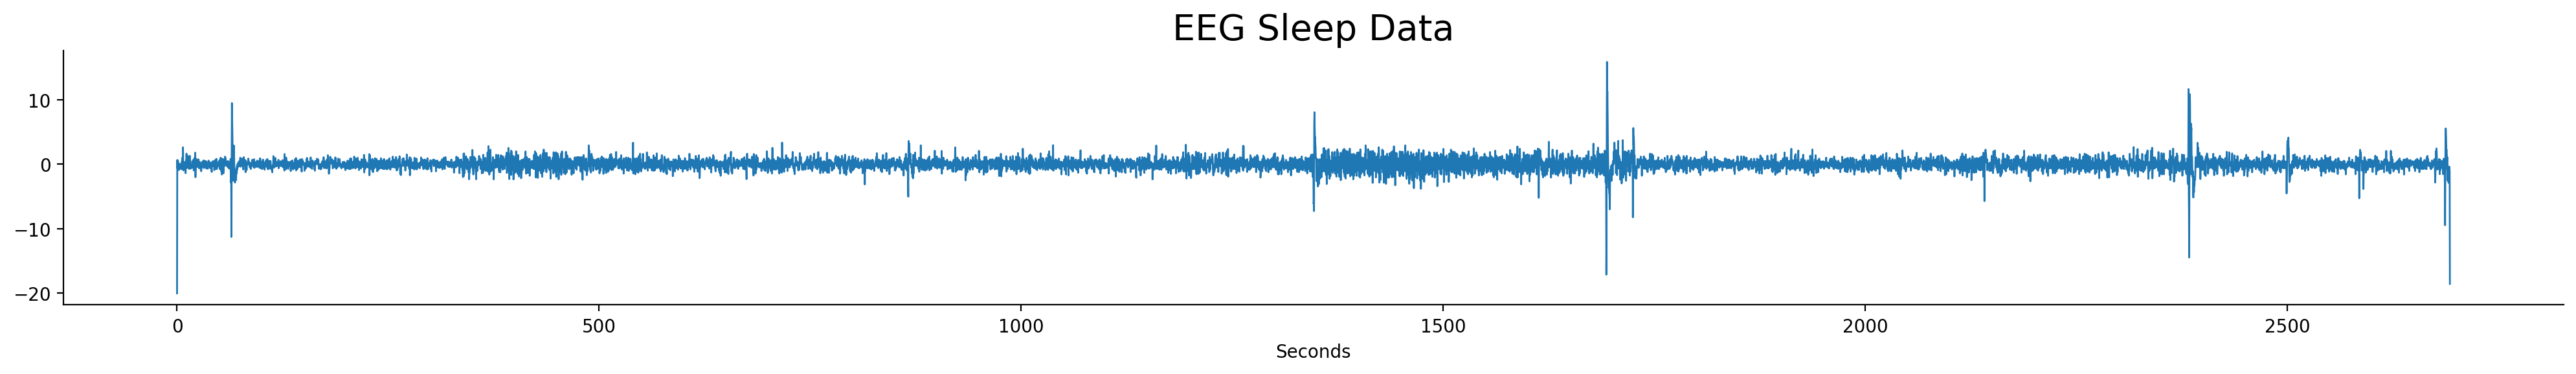

In [2]:
file = 'npo141.csv' # Dataset Length n:  269286
ds_name="EEG Sleep Data"
series = read_dataset_with_index(file)

ml = Motiflets(ds_name, series)
fig, ax = ml.plot_dataset()

# Known Motifs in Stage 2 sleep phases


<img src="https://upload.wikimedia.org/wikipedia/commons/7/71/Stage2sleep_new.svg">

This data set contains two main motifs: the K-Complex and  sleep spindles, two characteristic markers of stage 2 sleep.

# Parameters

In [3]:
df = pd.DataFrame()
motif_length = 25 # we set a reasonable length around 6.5 seconds
print("Motif Length", series.index[motif_length], "seconds")

ks = 20
dataset = os.getcwd() + '/../datasets/' + file
print(dataset)

Motif Length 6.5 seconds
/Users/bzcschae/workspace/motiflets_paper/notebooks/../datasets/npo141.csv


# k-Motiflets

## We learn the size k of the motif set

We plot the similarity of the motifs as a function of the cardinality of $k$-Motiflets to their extent. Elbow points represent large changes in similarity of the found motif set, indicative of a concept change from calibrations signal to heartbeats.

We will use the four different Distance messures available:
- z-Normed Euclidean Distance
- Euclidean Distance
- Cosine Distance
- Complexity Invariant Distance

# z-Normed Euclidean Distance

Data 10358


OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


Compute ks (20):   0%|          | 0/18 [00:00<?, ?it/s]

Chosen window-size: 25 in 3.5 s
Elbow Points [13 15]


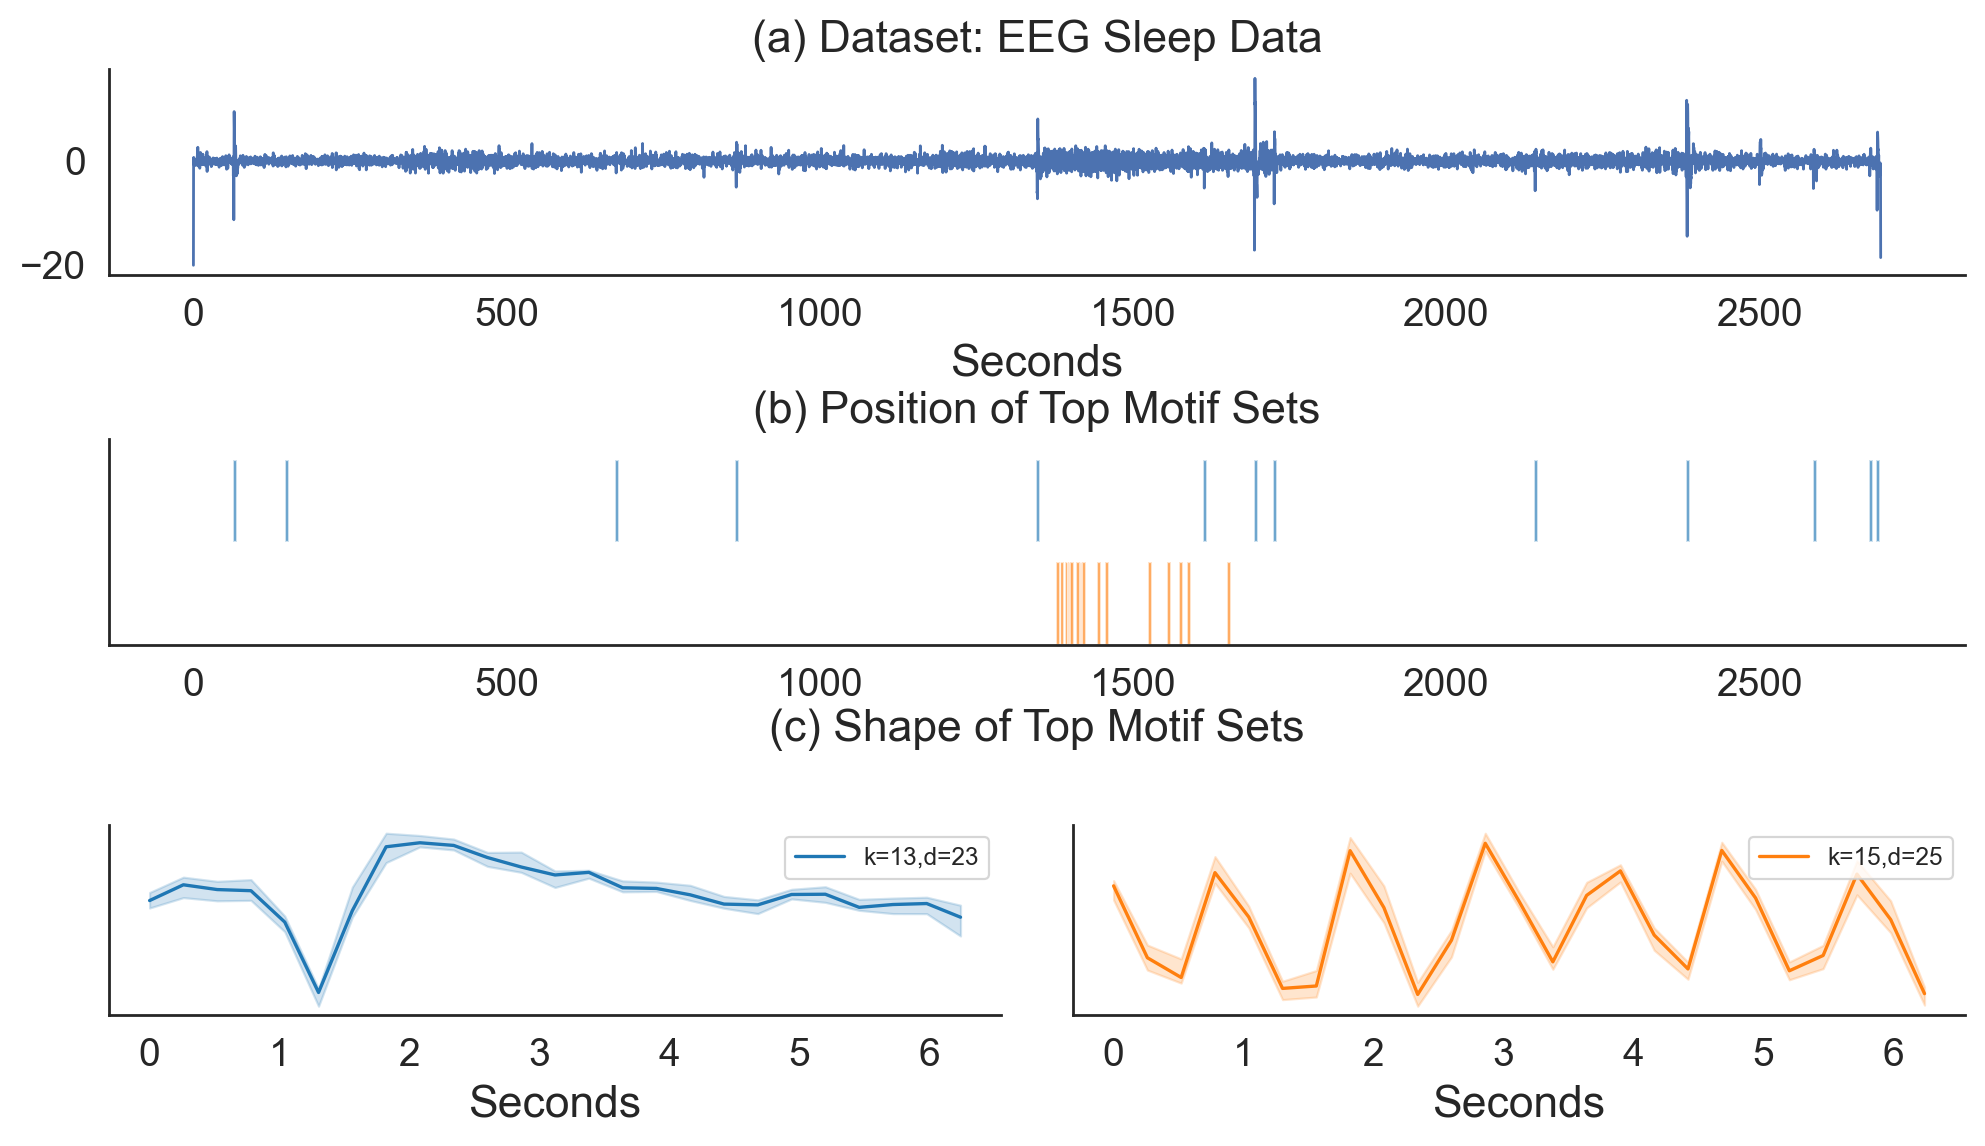

In [4]:
ml = Motiflets(ds_name, series, distance="znormed_ed")
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, plot_elbows=False)

# Complexity Invariant Distance

Data 10358


Compute ks (20):   0%|          | 0/18 [00:00<?, ?it/s]

Chosen window-size: 25 in 2.7 s
Elbow Points [17]


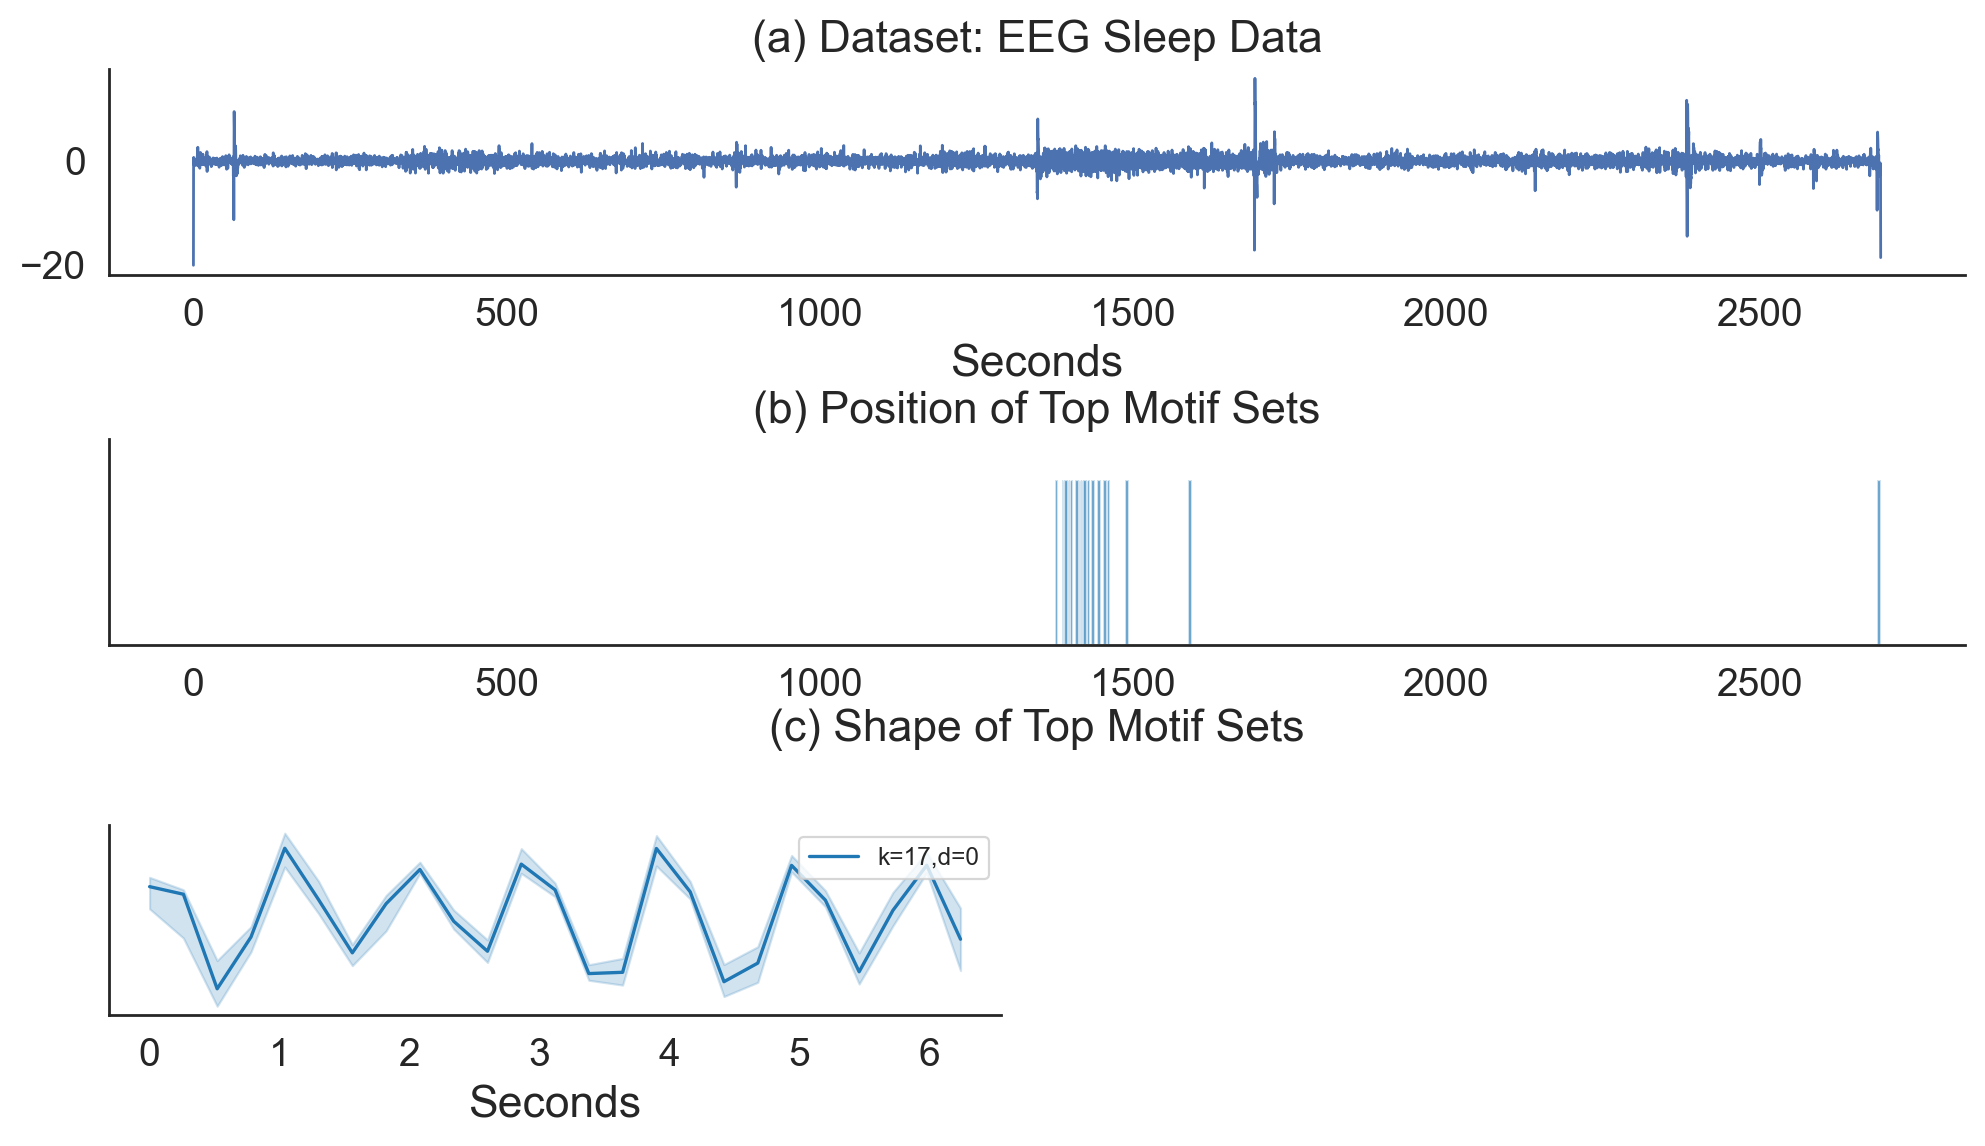

In [5]:
ml = Motiflets(ds_name, series, distance="CID")
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, plot_elbows=False)

# Cosine Distance 

Data 10358


Compute ks (20):   0%|          | 0/18 [00:00<?, ?it/s]

Chosen window-size: 25 in 2.5 s
Elbow Points [18]


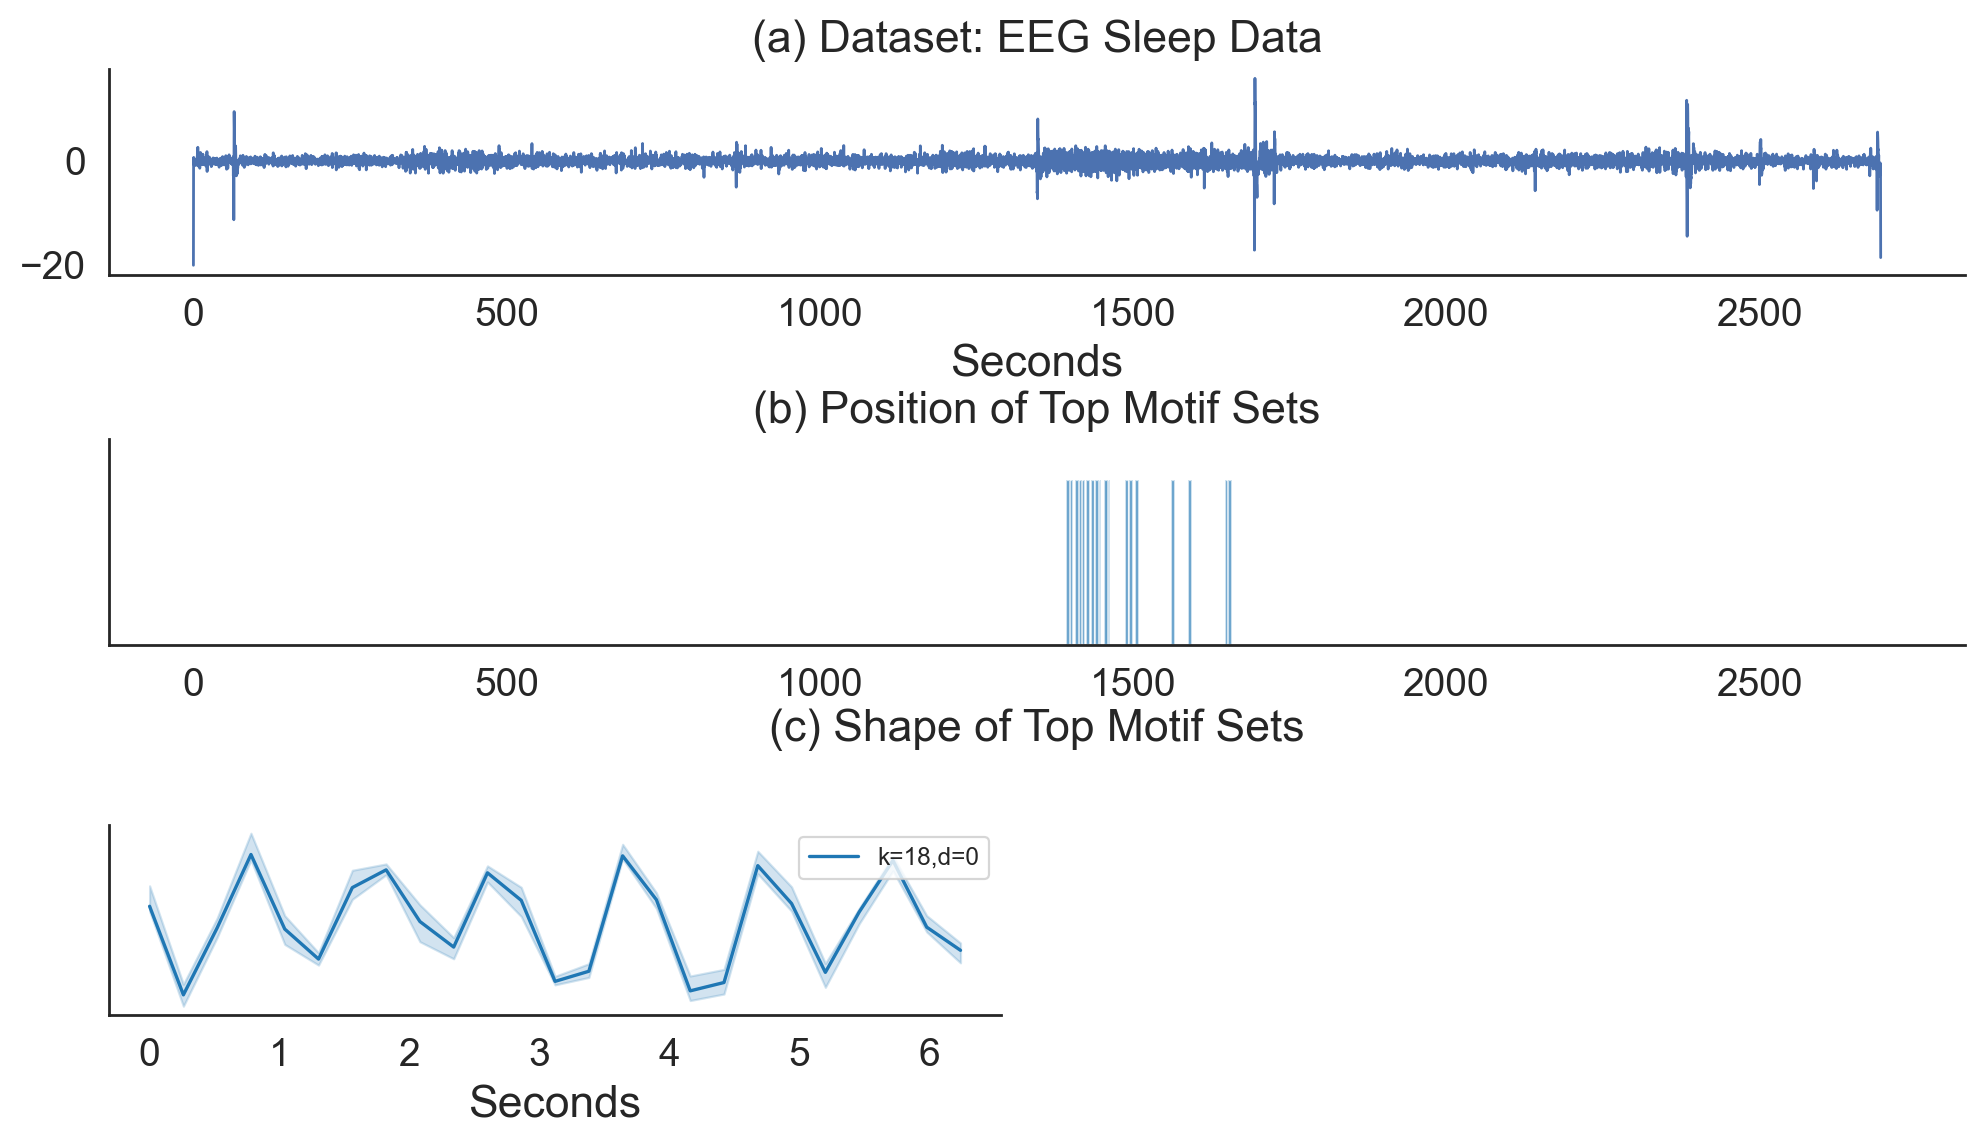

In [6]:
ml = Motiflets(ds_name, series, distance="cosine")
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, plot_elbows=False)

# Euclidean Distance

Data 10358


Compute ks (20):   0%|          | 0/18 [00:00<?, ?it/s]

Chosen window-size: 25 in 2.3 s
Elbow Points [13 16]


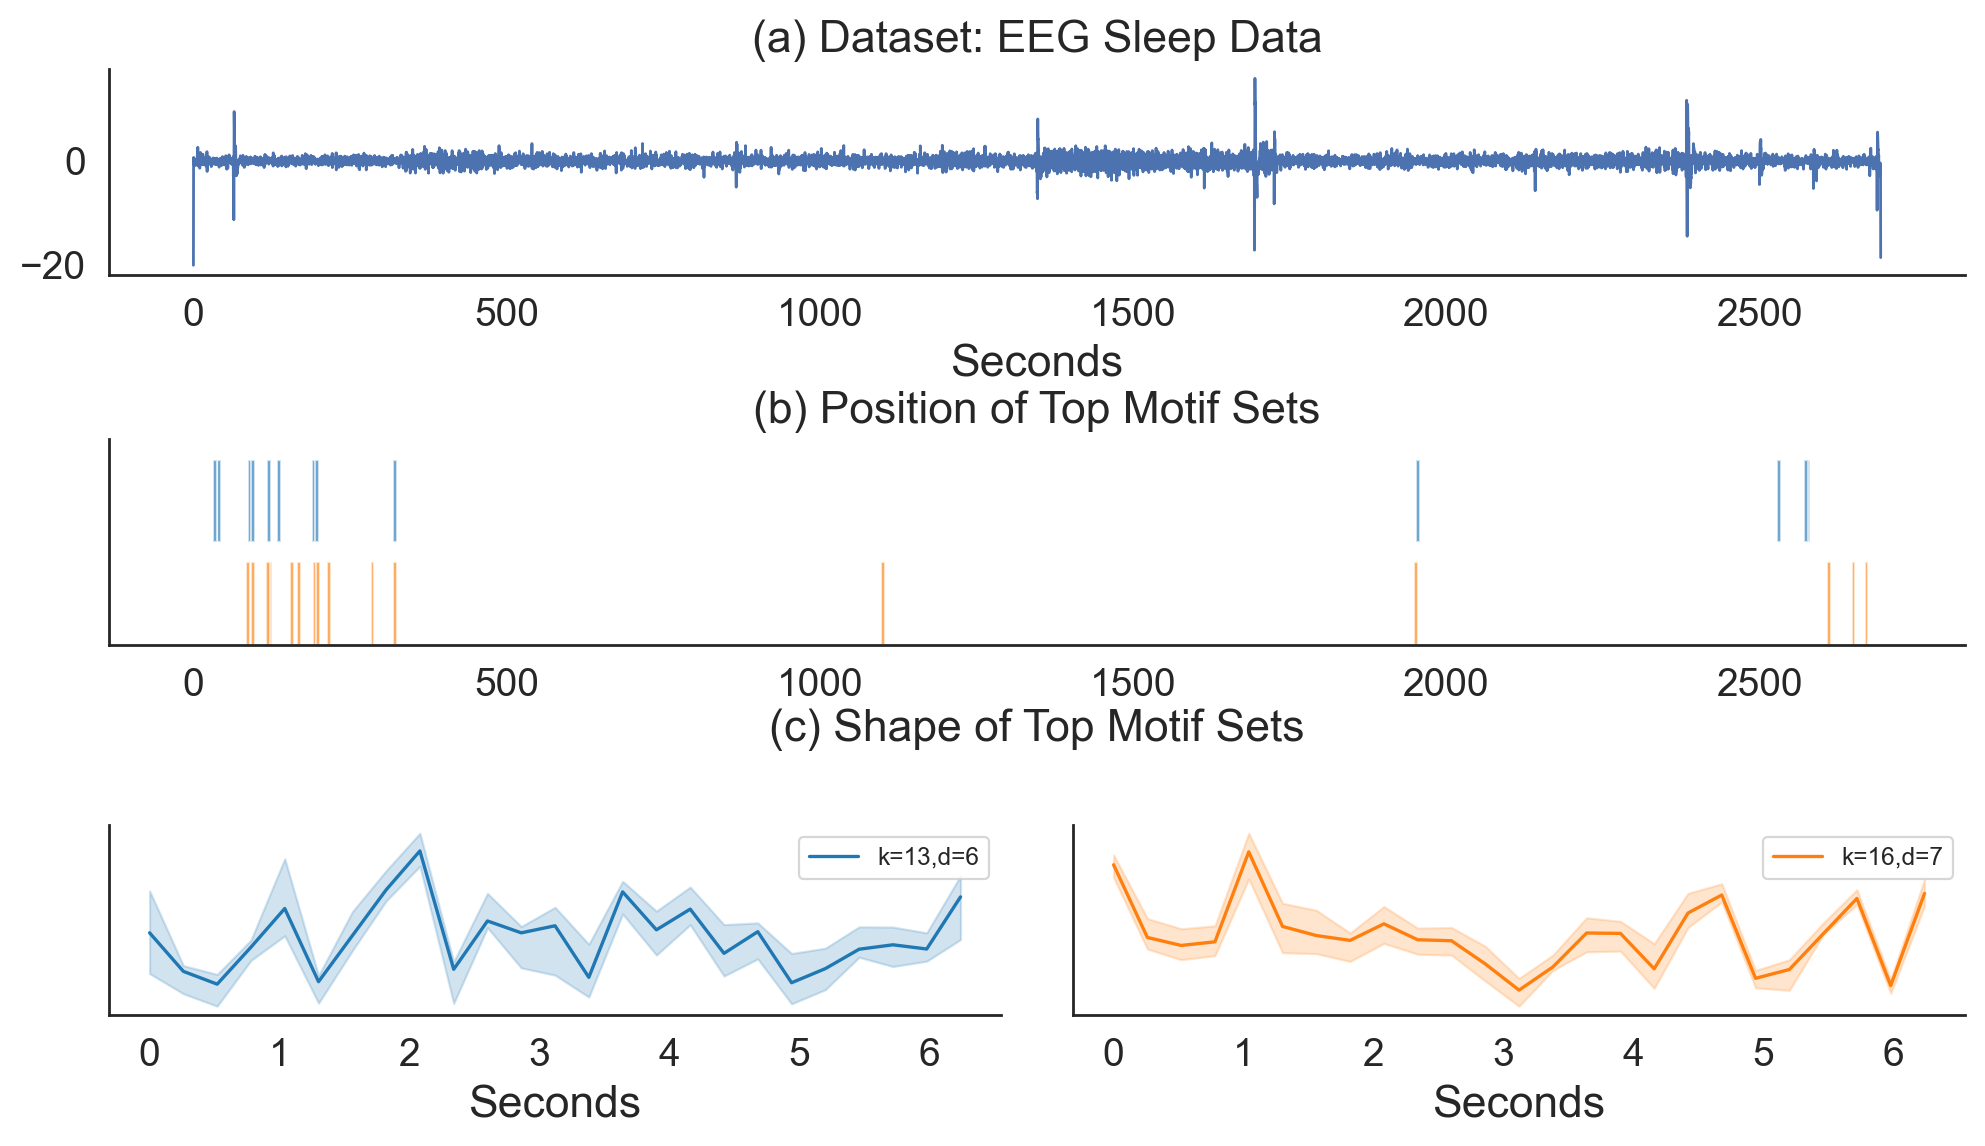

In [7]:
ml = Motiflets(ds_name, series, distance="ed")
dists, candidates, elbow_points = ml.fit_k_elbow(ks, motif_length, plot_elbows=False)